# TensorFlow Basics

In [75]:
import tensorflow as tf

## Simple constants

In [76]:
hello = tf.constant("Hello ")
world = tf.constant("World")
with tf.Session() as sess:
    result = sess.run(hello+world)
print(result)

b'Hello World'


## Operations

In [77]:
a = tf.constant(10)
b = tf.constant(20)
with tf.Session() as sess:
    addition = sess.run(a+b)
    multiplication = sess.run(a*b)
print(addition)
print(multiplication)

30
200


## Working with a group of operations

In [78]:
const = tf.constant(10)
fill_mat = tf.fill((4,4),10)
myzeros = tf.zeros((4,4))
myones = tf.ones((4,4))
myrandn = tf.random_normal((4,4), mean = 0, stddev = 1.0)
myrandu = tf.random_uniform((4,4), minval=0, maxval =1)
my_ops = [const, fill_mat, myzeros, myones, myrandn, myrandu]
with tf.Session() as sess:
    for op in my_ops:
        print(op)
        print(sess.run(op))
        print()

Tensor("Const_7:0", shape=(), dtype=int32)
10

Tensor("Fill:0", shape=(4, 4), dtype=int32)
[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]

Tensor("zeros:0", shape=(4, 4), dtype=float32)
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]

Tensor("ones:0", shape=(4, 4), dtype=float32)
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]

Tensor("random_normal:0", shape=(4, 4), dtype=float32)
[[-0.22524352  0.48237228 -0.82078487  3.01135111]
 [ 0.00545869 -0.834593   -0.92740136  0.69436634]
 [-0.65776408 -1.27777672 -0.1419917   0.52560955]
 [ 1.68673515 -1.74032402 -0.78021753 -1.37309158]]

Tensor("random_uniform:0", shape=(4, 4), dtype=float32)
[[ 0.57191324  0.23138583  0.64000297  0.05784225]
 [ 0.70652795  0.35563576  0.8453964   0.2437402 ]
 [ 0.60556591  0.20199621  0.04805243  0.81644404]
 [ 0.12995601  0.93353736  0.22052491  0.71197939]]



## Matrix multiplication

In [79]:
a = tf.constant([[1,2],[3,4]])
b = tf.constant([[10],[100]])
result = tf.matmul(a,b)
with tf.Session() as sess:
    print(sess.run(result))

[[210]
 [430]]


## Graphs

In [80]:
graph_one = tf.get_default_graph()
graph_two = tf.Graph()
with graph_two.as_default():
    print(graph_two is tf.get_default_graph())
print(graph_one is tf.get_default_graph())

True
True


## Variables and Placeholders

In [81]:
sess = tf.InteractiveSession()

### Variables

In [82]:
my_tensor = tf.random_uniform((4,4),0,1)
my_var = tf.Variable(initial_value= my_tensor)

init = tf.global_variables_initializer()
sess.run(init)

sess.run(my_var)

array([[ 0.84827316,  0.7577678 ,  0.55914938,  0.30990303],
       [ 0.95548916,  0.70689785,  0.23078871,  0.48589516],
       [ 0.71285999,  0.14615691,  0.81334543,  0.25708985],
       [ 0.82702184,  0.70338643,  0.70925617,  0.55189872]], dtype=float32)

### Placeholders

In [83]:
ph = tf.placeholder(tf.float32)

## More tensorFlow Graphs

In [84]:
import numpy as np
np.random.seed(101)
tf.set_random_seed(101)
"""
Simple calculation example
"""
rand_a = np.random.uniform(0,100,(5,5))
rand_b = np.random.uniform(0,100,(5,1))
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
add_op = a + b
mult_op = a * b
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:rand_a,b:rand_b})
    mult_result = sess.run(mult_op, feed_dict={a:rand_a,b:rand_b})
print(add_result)
print()
print(mult_result)

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]

[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


## Example Neural Network

In [85]:
n_features = 10
n_dense_neurons = 3
x = tf.placeholder(tf.float32, (None, n_features))
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))
xW = tf.matmul(x,W)
z = tf.add(xW, b)
a = tf.sigmoid(z)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x:np.random.random([1,n_features])})
print(layer_out)

[[ 0.9905979   0.99483466  0.40837812]]


## Simple Regression Example

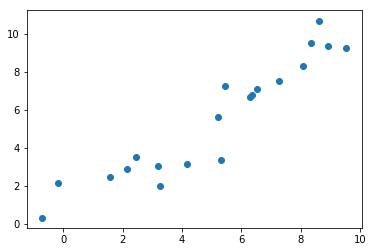

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
Random numbers with some noise
"""
x_data = np.linspace(0,10,20) + np.random.uniform(-1,2,20)
y_label = np.linspace(0,10,20) + np.random.uniform(-1,2,20)
plt.scatter(x_data, y_label)

Regression for y=mx+b

(-2, 12)

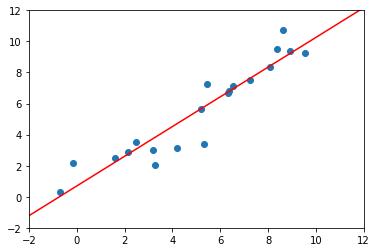

In [87]:
m = tf.Variable(np.random.rand(1))
b = tf.Variable(np.random.rand(1))
error = 0
for x,y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2
#Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    training_steps = 500
    for i in range(training_steps):
        sess.run(train)
    final_slope, final_intercept = sess.run([m,b])
x_test = np.linspace(-2,12,20)
y_pred_plot = final_slope*x_test + final_intercept
plt.plot(x_test, y_pred_plot,'r')
plt.scatter(x_data, y_label)
plt.xlim(-2,12)
plt.ylim(-2,12)

## Larger Dataset Regression

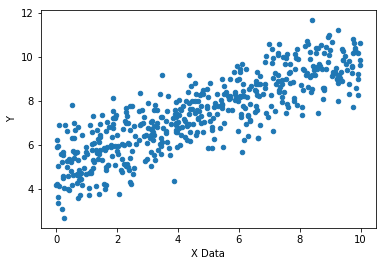

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data))
y_true = (.5 * x_data) + 5 + noise
x_df = pd.DataFrame(data=x_data, columns = ['X Data'])
y_df = pd.DataFrame(data=y_true, columns = ['Y'])
my_data = pd.concat([x_df,y_df],axis=1)
my_data.sample(n=500).plot(kind = 'scatter', x='X Data', y = 'Y')

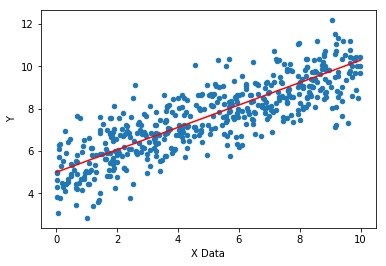

In [89]:
batch_size = 8
m = tf.Variable(np.random.randn(1))
b = tf.Variable(np.random.randn(1))
xph = tf.placeholder(tf.float64, [batch_size])
yph = tf.placeholder(tf.float64, [batch_size])
y_model = m * xph + b
error = tf.reduce_sum(tf.square(yph-y_model))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = .001)
train = optimizer.minimize(error)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    batches = 5000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
    model_m, model_b = sess.run([m,b])

y_hat = x_data * model_m + model_b
my_data.sample(n=500).plot(kind = 'scatter', x='X Data', y = 'Y')
plt.plot(x_data,y_hat,'r')

## TensorFlow Estimator

In [90]:
import tensorflow as tf
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

#Training sets and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_true, test_size = .3, random_state = 101)

input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, 
                                                 batch_size = 8, num_epochs = None,
                                                shuffle = True)
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, 
                                                 batch_size = 8, num_epochs = 1000,
                                                shuffle = False)
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_test}, y_test, 
                                                 batch_size = 8, num_epochs = 1000,
                                                shuffle = False)
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Ripti\\AppData\\Local\\Temp\\tmppexpu9cm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002B0643DEBA8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Ripti\AppData\Local\Temp\tmppexpu9cm\model.ckpt.
INFO:tensorflow:loss = 587.854, step = 1
INFO:tensorflow:global_step/sec: 436.786
INFO:tensorflow:loss = 17.1739, step = 101 (0.232 sec)
INFO:tensorflow:global_step/sec: 474.863
INFO:tensorflow:loss = 32.2359, step = 201 (0.210 sec)
I

train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

test_metrics = estimator.evaluate(input_fn=test_input_func, steps=1000)

In [91]:
print('TRAINING DATA')
print(train_metrics)
print('TEST DATA')
print(test_metrics)

TRAINING DATA
{'average_loss': 1.1141723, 'loss': 8.9133787, 'global_step': 1000}
TEST DATA
{'average_loss': 1.1259887, 'loss': 9.0079098, 'global_step': 1000}


INFO:tensorflow:Restoring parameters from C:\Users\Ripti\AppData\Local\Temp\tmppexpu9cm\model.ckpt-1000


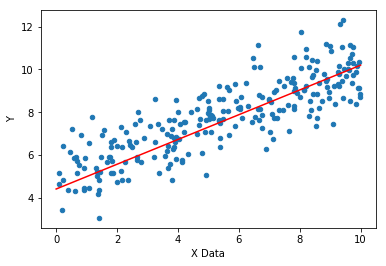

In [92]:
new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':new_data}, shuffle = False)
predictions = []
for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])
my_data.sample(n=250).plot(kind='scatter',x='X Data', y='Y')
plt.plot(new_data, predictions,  'r')

## Tensorflow Classifications

For when you have categorical data; let's use a binary classification.

In [93]:
import pandas as pd
diabetus = pd.read_csv('pima-indians-diabetes.csv')
diabetus.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [94]:
# Normalization
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 
                'Blood_pressure', 'Triceps', 
                'Insulin', 'BMI', 'Pedigree']
diabetus[cols_to_norm] = diabetus[cols_to_norm].apply(
    lambda x:(x-x.min())/(x.max()-x.min()))

In [95]:
# Continuous features
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

# Categorical features
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list(
    'Group',['A','B','C','D'])

### Converting Continuous to Categorical

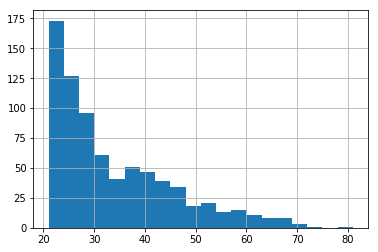

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
diabetus['Age'].hist(bins=20)
age_buckets = tf.feature_column.bucketized_column(
    age, boundaries=[20,30,40,50,60,70,80])
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,
             insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

### Training and Test Sets

In [97]:
from sklearn.model_selection import train_test_split
x_data = diabetus.drop('Class',axis=1)
labels = diabetus['Class']
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,
                                                    test_size=0.33, random_state=101)
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,
                                        batch_size=10,num_epochs=1000,shuffle=True)
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Ripti\\AppData\\Local\\Temp\\tmp05nr32m5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002B05AA50898>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Ripti\AppData\Local\Temp\tmp05nr32m5\model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 127.351
INFO:tensorflow:loss = 5.57055, step = 101 (0.785 sec)
INFO:tensorflow:global_step/sec: 149.08
INFO:tensorflow:loss = 5.15163, step = 201 (0.671 sec)
IN

### Evaluating the Model

In [98]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)
results = model.evaluate(eval_input_func)
results

INFO:tensorflow:Starting evaluation at 2017-12-21-02:40:17
INFO:tensorflow:Restoring parameters from C:\Users\Ripti\AppData\Local\Temp\tmp05nr32m5\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-12-21-02:40:18
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.732283, accuracy_baseline = 0.65748, auc = 0.78271, auc_precision_recall = 0.619375, average_loss = 0.533613, global_step = 1000, label/mean = 0.34252, loss = 5.21299, prediction/mean = 0.359163


{'accuracy': 0.73228347,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78271043,
 'auc_precision_recall': 0.61937535,
 'average_loss': 0.53361279,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.2129865,
 'prediction/mean': 0.35916343}

In [99]:
# Predictions
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)
predictions = model.predict(pred_input_func)

Let's use a Dense Neural Network

In [100]:
embedded_group_col = tf.feature_column.embedding_column(
    assigned_group, dimension=4)
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,
             bmi,diabetes_pedigree ,embedded_group_col, age_buckets]
input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],
                                       feature_columns=feat_cols,n_classes=2)
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Ripti\\AppData\\Local\\Temp\\tmpbv82dg_3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002AEAD030D68>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Ripti\AppData\Local\Temp\tmpbv82dg_3\model.ckpt.
INFO:tensorflow:loss = 7.01344, step = 1
INFO:tensorflow:global_step/sec: 131.478
INFO:tensorflow:loss = 5.80182, step = 101 (0.761 sec)
INFO:tensorflow:global_step/sec: 142.598
INFO:tensorflow:loss = 6.48086, step = 201 (0.700 sec)
I

In [101]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
    x = X_test, y = y_test, batch_size = 10, num_epochs = 1, shuffle = False)

In [102]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-12-21-02:40:30
INFO:tensorflow:Restoring parameters from C:\Users\Ripti\AppData\Local\Temp\tmpbv82dg_3\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-12-21-02:40:31
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.751969, accuracy_baseline = 0.65748, auc = 0.81444, auc_precision_recall = 0.685009, average_loss = 0.508686, global_step = 1000, label/mean = 0.34252, loss = 4.96947, prediction/mean = 0.378027


{'accuracy': 0.7519685,
 'accuracy_baseline': 0.65748036,
 'auc': 0.81444001,
 'auc_precision_recall': 0.68500859,
 'average_loss': 0.50868565,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 4.9694676,
 'prediction/mean': 0.37802684}

# Saving and Loading Models

In [103]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(101)
tf.set_random_seed(101)

# Artificial Data
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
m = tf.Variable(np.random.rand(1))
b = tf.Variable(np.random.rand(1))
error = tf.reduce_mean(y_label - (m*x_data+b))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)
init = tf.global_variables_initializer()

## Saving the Model

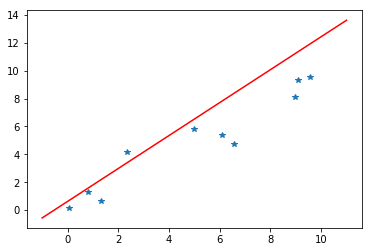

In [104]:
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    epochs = 100
    for i in range(epochs):
        sess.run(train)
    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])
    saver.save(sess,'new_models/model_from_course.ckpt')
    
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')

## Loading a Model

INFO:tensorflow:Restoring parameters from new_models/model_from_course.ckpt


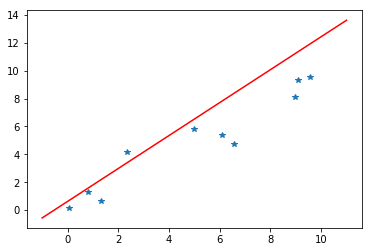

In [105]:
with tf.Session() as sess:
    # Restore the model
    saver.restore(sess,'new_models/model_from_course.ckpt')
    # Fetch Back Results
    restored_slope , restored_intercept = sess.run([m,b])
x_test = np.linspace(-1,11,10)
y_pred_plot = restored_slope*x_test + restored_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')

# Regression Exercise

## The Data

**Import the cal_housing.csv file with pandas. Separate it into a training (70%) and testing set(30%).**

In [106]:
import pandas as pd
housing = pd.read_csv('cal_housing_clean.csv')
housing.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [107]:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
housingMedianAge,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
totalRooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
totalBedrooms,20640.0,537.898014,421.247906,1.0000,295.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
medianIncome,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
medianHouseValue,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [108]:
from sklearn.model_selection import train_test_split
x_data = housing.drop(['medianHouseValue'],axis=1)
y_val = housing['medianHouseValue']
X_train, X_test, y_train, y_test = train_test_split(
    x_data,y_val,test_size=0.3,random_state=101)

## Scale the Feature Data

**Use sklearn preprocessing to create a MinMaxScaler for the feature data. Fit this scaler only to the training data. Then use it to transform X_test and X_train. Then use the scaled X_test and X_train along with pd.Dataframe to re-create two dataframes of scaled data.**

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train),
                       columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test),
                      columns = X_test.columns,index=X_test.index)

## Create Feature Columns

**Create the necessary tf.feature_column objects for the estimator. They should all be trated as continuous numeric_columns. **

**Create the input function for the estimator object. (play around with batch_size and num_epochs)**

**Create the estimator model. Use a DNNRegressor. Play around with the hidden units! **

**Train the model for ~1,000 steps. (Later come back to this and train it for more and check for improvement) **

In [115]:
import tensorflow as tf
age = tf.feature_column.numeric_column('housingMedianAge')
rooms = tf.feature_column.numeric_column('totalRooms')
bedrooms = tf.feature_column.numeric_column('totalBedrooms')
pop = tf.feature_column.numeric_column('population')
households = tf.feature_column.numeric_column('households')
income = tf.feature_column.numeric_column('medianIncome')
feat_cols = [ age,rooms,bedrooms,pop,households,income]
input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_train,y=y_train ,
    batch_size=10,num_epochs=1000,shuffle=True)
model = tf.estimator.DNNRegressor(hidden_units=[6,6,6],feature_columns=feat_cols)
# model.train(input_fn=input_func,steps=25000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Ripti\\AppData\\Local\\Temp\\tmpt8ltkpud', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002B06D54ABE0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


**Create a prediction input function and then use the .predict method off your estimator model to create a list or predictions on your test data. **

**Calculate the RMSE**

In [113]:
from sklearn.metrics import mean_squared_error
predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)
pred_gen = model.predict(predict_input_func)
predictions = list(pred_gen)

final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'])
mean_squared_error(y_test,final_preds)**0.5

INFO:tensorflow:Restoring parameters from C:\Users\Ripti\AppData\Local\Temp\tmpjhqgpype\model.ckpt-25000


96258.035354416352

# Classification Exercise

## THE DATA

**Read in the census_data.csv data with pandas**

In [118]:
import pandas as pd
census = pd.read_csv("census_data.csv")
census.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**TensorFlow won't be able to understand strings as labels, you'll need to use pandas .apply() method to apply a custom function that converts them to 0s and 1s. This might be hard if you aren't very familiar with pandas, so feel free to take a peek at the solutions for this part.**

**Convert the Label column to 0s and 1s instead of strings.**

In [119]:
census['income_bracket'].unique()
def label_fix(label):
    if label==' <=50K':
        return 0
    else:
        return 1
census['income_bracket'] = census['income_bracket'].apply(label_fix)

## Perform a Train Test Split on the Data

**Create the Feature Columns for tf.esitmator **

**Take note of categorical vs continuous values! **

**Create the tf.feature_columns for the categorical values. Use vocabulary lists or just use hash buckets. **

**Create the continuous feature_columns for the continuous values using numeric_column **

**Put all these variables into a single list with the variable name feat_cols **

**Create Input Function **

**Batch_size is up to you. But do make sure to shuffle!**

**Create your model with tf.estimator **

**Create a LinearClassifier.(If you want to use a DNNClassifier, keep in mind you'll need to create embedded columns out of the cateogrical feature that use strings, check out the previous lecture on this for more info.)**

**Train your model on the data, for at least 5000 steps.**

In [122]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
x_data = census.drop('income_bracket',axis=1)
y_labels = census['income_bracket']

X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.3,random_state=101)

# Categorical
gender = tf.feature_column.categorical_column_with_vocabulary_list(
    "gender", ["Female", "Male"])
occupation = tf.feature_column.categorical_column_with_hash_bucket(
    "occupation", hash_bucket_size=1000)
marital_status = tf.feature_column.categorical_column_with_hash_bucket(
    "marital_status", hash_bucket_size=1000)
relationship = tf.feature_column.categorical_column_with_hash_bucket(
    "relationship", hash_bucket_size=1000)
education = tf.feature_column.categorical_column_with_hash_bucket(
    "education", hash_bucket_size=1000)
workclass = tf.feature_column.categorical_column_with_hash_bucket(
    "workclass", hash_bucket_size=1000)
native_country = tf.feature_column.categorical_column_with_hash_bucket(
    "native_country", hash_bucket_size=1000)

# Continuous
age = tf.feature_column.numeric_column("age")
education_num = tf.feature_column.numeric_column("education_num")
capital_gain = tf.feature_column.numeric_column("capital_gain")
capital_loss = tf.feature_column.numeric_column("capital_loss")
hours_per_week = tf.feature_column.numeric_column("hours_per_week")

feat_cols = [gender,occupation,marital_status,relationship,
             education,workclass,native_country,age,
             education_num,capital_gain,capital_loss,hours_per_week]
input_func=tf.estimator.inputs.pandas_input_fn(
    x=X_train,y=y_train,batch_size=100,num_epochs=None,shuffle=True)
model = tf.estimator.LinearClassifier(feature_columns=feat_cols)

# model.train(input_fn=input_func,steps=5000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Ripti\\AppData\\Local\\Temp\\tmpfd82o3_o', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002B071288278>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## Evaluation

**Create a prediction input function. Remember to only supprt X_test data and keep shuffle=False. **

**Use model.predict() and pass in your input function. This will produce a generator of predictions, which you can then transform into a list, with list() **

**Create a list of only the class_ids key values from the prediction list of dictionaries, these are the predictions you will use to compare against the real y_test values. **

**Import classification_report from sklearn.metrics and then see if you can figure out how to use it to easily get a full report of your model's performance on the test data. **

In [121]:
from sklearn.metrics import classification_report
pred_fn = tf.estimator.inputs.pandas_input_fn(
    x=X_test,batch_size=len(X_test),shuffle=False)
predictions = list(model.predict(input_fn=pred_fn))
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])
print(classification_report(y_test,final_preds))

INFO:tensorflow:Restoring parameters from C:\Users\Ripti\AppData\Local\Temp\tmpfimvx4k1\model.ckpt-5000
             precision    recall  f1-score   support

          0       0.86      0.92      0.89      7436
          1       0.69      0.53      0.60      2333

avg / total       0.82      0.83      0.82      9769

